# EN.535.610 Spring 2023 Project Code

## Authors: Chris Hennessy, Stephen Marinsek, Ryan Payne

### Import the required packages

In [23]:
#Import all required dependencies here
import math
import numpy as np
import matplotlib.pyplot as plt

#Import Matplotlib and configure inline plotting
#Setting up options for plotting
%matplotlib inline
#Settings for jupyter book: svg for html version, high-resolution png for pdf
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'png')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

### Define the required classes for the computation

In [26]:
#Create a class to define internal nodes
#Where x-rays will be absorbed and heat transfer will occur through conduction only
class InternalElement:
    
    #Class constructor
    def __init__(self,  
                 t_conductivity,
                 specific_heat,
                 cs_area, 
                 ic_temp, 
                 element_length,
                 ablation_temp,
                 rad_abs_coefficient):
        
        #Initialize instance state
        self.absorbed_energy = 0
        self.temp = ic_temp
        self.t_conductivity = t_conductivity
        self.specific_heat = specific_heat
        self.cs_area = cs_area
        self.nm1_temp = 0
        self.nm0_temp = 0
        self.is_ablated = False
        self.element_length = element_length
        self.ablation_temp = ablation_temp
        self.rad_abs_coefficient = rad_abs_coefficient
        
    #Function to set the initial conditions for the element
    def set_ics(self, initial_temp):
        
        self.nm1_temp = initial_temp

#Create a class to define boundary nodes where no x-rays are absorbed
#and heat transfer will occur to surroundings via radiation
class BoundaryElement:
    
    #Class constructor
    def __init__(self, t_emissivity, cs_area):
        
        #Initialize instance state
        self.t_emissivity = emissivity
        self.cs_area = cs_area
        self.scene_temp = 0
        
    #Function to set the scene temperature
    def set_ics(self, scene_temp):
        
        self.scene_temp = scene_temp
        
#Create a class to define the entire section of material
#The computation will be performed here
class Section:
    
    eV_to_Joule = 1.602e-19
    
    #Class constructor
    def __init__(self):
        self.elements_list = []
        self.rem_elements = []
        self.has_run_rad = False
        self.has_run_ablation = False
        self.has_run_temp = False
        
    #Function to add a material layer to the section
    #Materials added from foreward (x-ray incoming direction) and populates back
    def add_matl(self,
                 quantity,
                 t_conductivity,
                 specific_heat,
                 cs_area,
                 ic_temp,
                 element_length,
                 ablation_temp,
                 rad_abs_coefficient):
        
        for i in range(0, quantity):
            new_element = InternalElement(t_conductivity,
                                          specific_heat,
                                          cs_area,
                                          ic_temp,
                                          element_length,
                                          ablation_temp,
                                          rad_abs_coefficient)
            self.elements_list.append(new_element)
        
    #Function to propagate x-rays through material
    def prop_xray_energy(self, x_ray_energy):
    
        tsprt_flux = x_ray_energy
        for element in self.elements_list:
            delta_tsprt_flux = tsprt_flux * rad_abs_coefficient
            element.absorbed_energy += delta_tsprt_flux
            tsprt_flux = tsprt_flux - delta_tsprt_flux
            
        for element in self.elements_list:
            energy_joules = element.absorbed_energy*Section.eV_to_Joule
            volume = element.cs_area * element_length
            element.temp = energy_joules / (volume*element.specific_heat) + element.temp
    
    #Function to get the total absorbed x-ray energy for each element
    def get_absorbed_energy(self):
        absorbed_energy_list = []
        for element in self.elements_list:
            if element.absorbed_energy is not None:
                absorbed_energy_list.append(element.absorbed_energy)
        
        print(len(absorbed_energy_list))
        return absorbed_energy_list
    
    #Function to get the temperature distribution for each element
    def get_temperatures(self):
        temp_list = []
        for element in self.elements_list:
            if element.temp is not None:
                temp_list.append(element.temp)
                
        return temp_list
    
    #Function to evaluate ablation
    def eval_ablation(self):
        
        for element in elements_list:
            if (element.nm0_temp >= element.ablation_temp):
                element.is_ablated = True
    
    #Function to initialize for transient thermal problem
    def init_transient_thermal(self, front_bc_ele, back_bc_ele):
        
        rem_elements = []
        rem_elements.append(front_bc_ele)
        for element in elements_list:
            if element.is_ablated == False:
                rem_elements.append(element)
        rem_elements.append(back_bc_ele)
    
    #Function to iterate through time for transient thermal analyses
    #def eval_transient_thermal(self, interations):
    
    #Functions to return results

### Testing Section

10


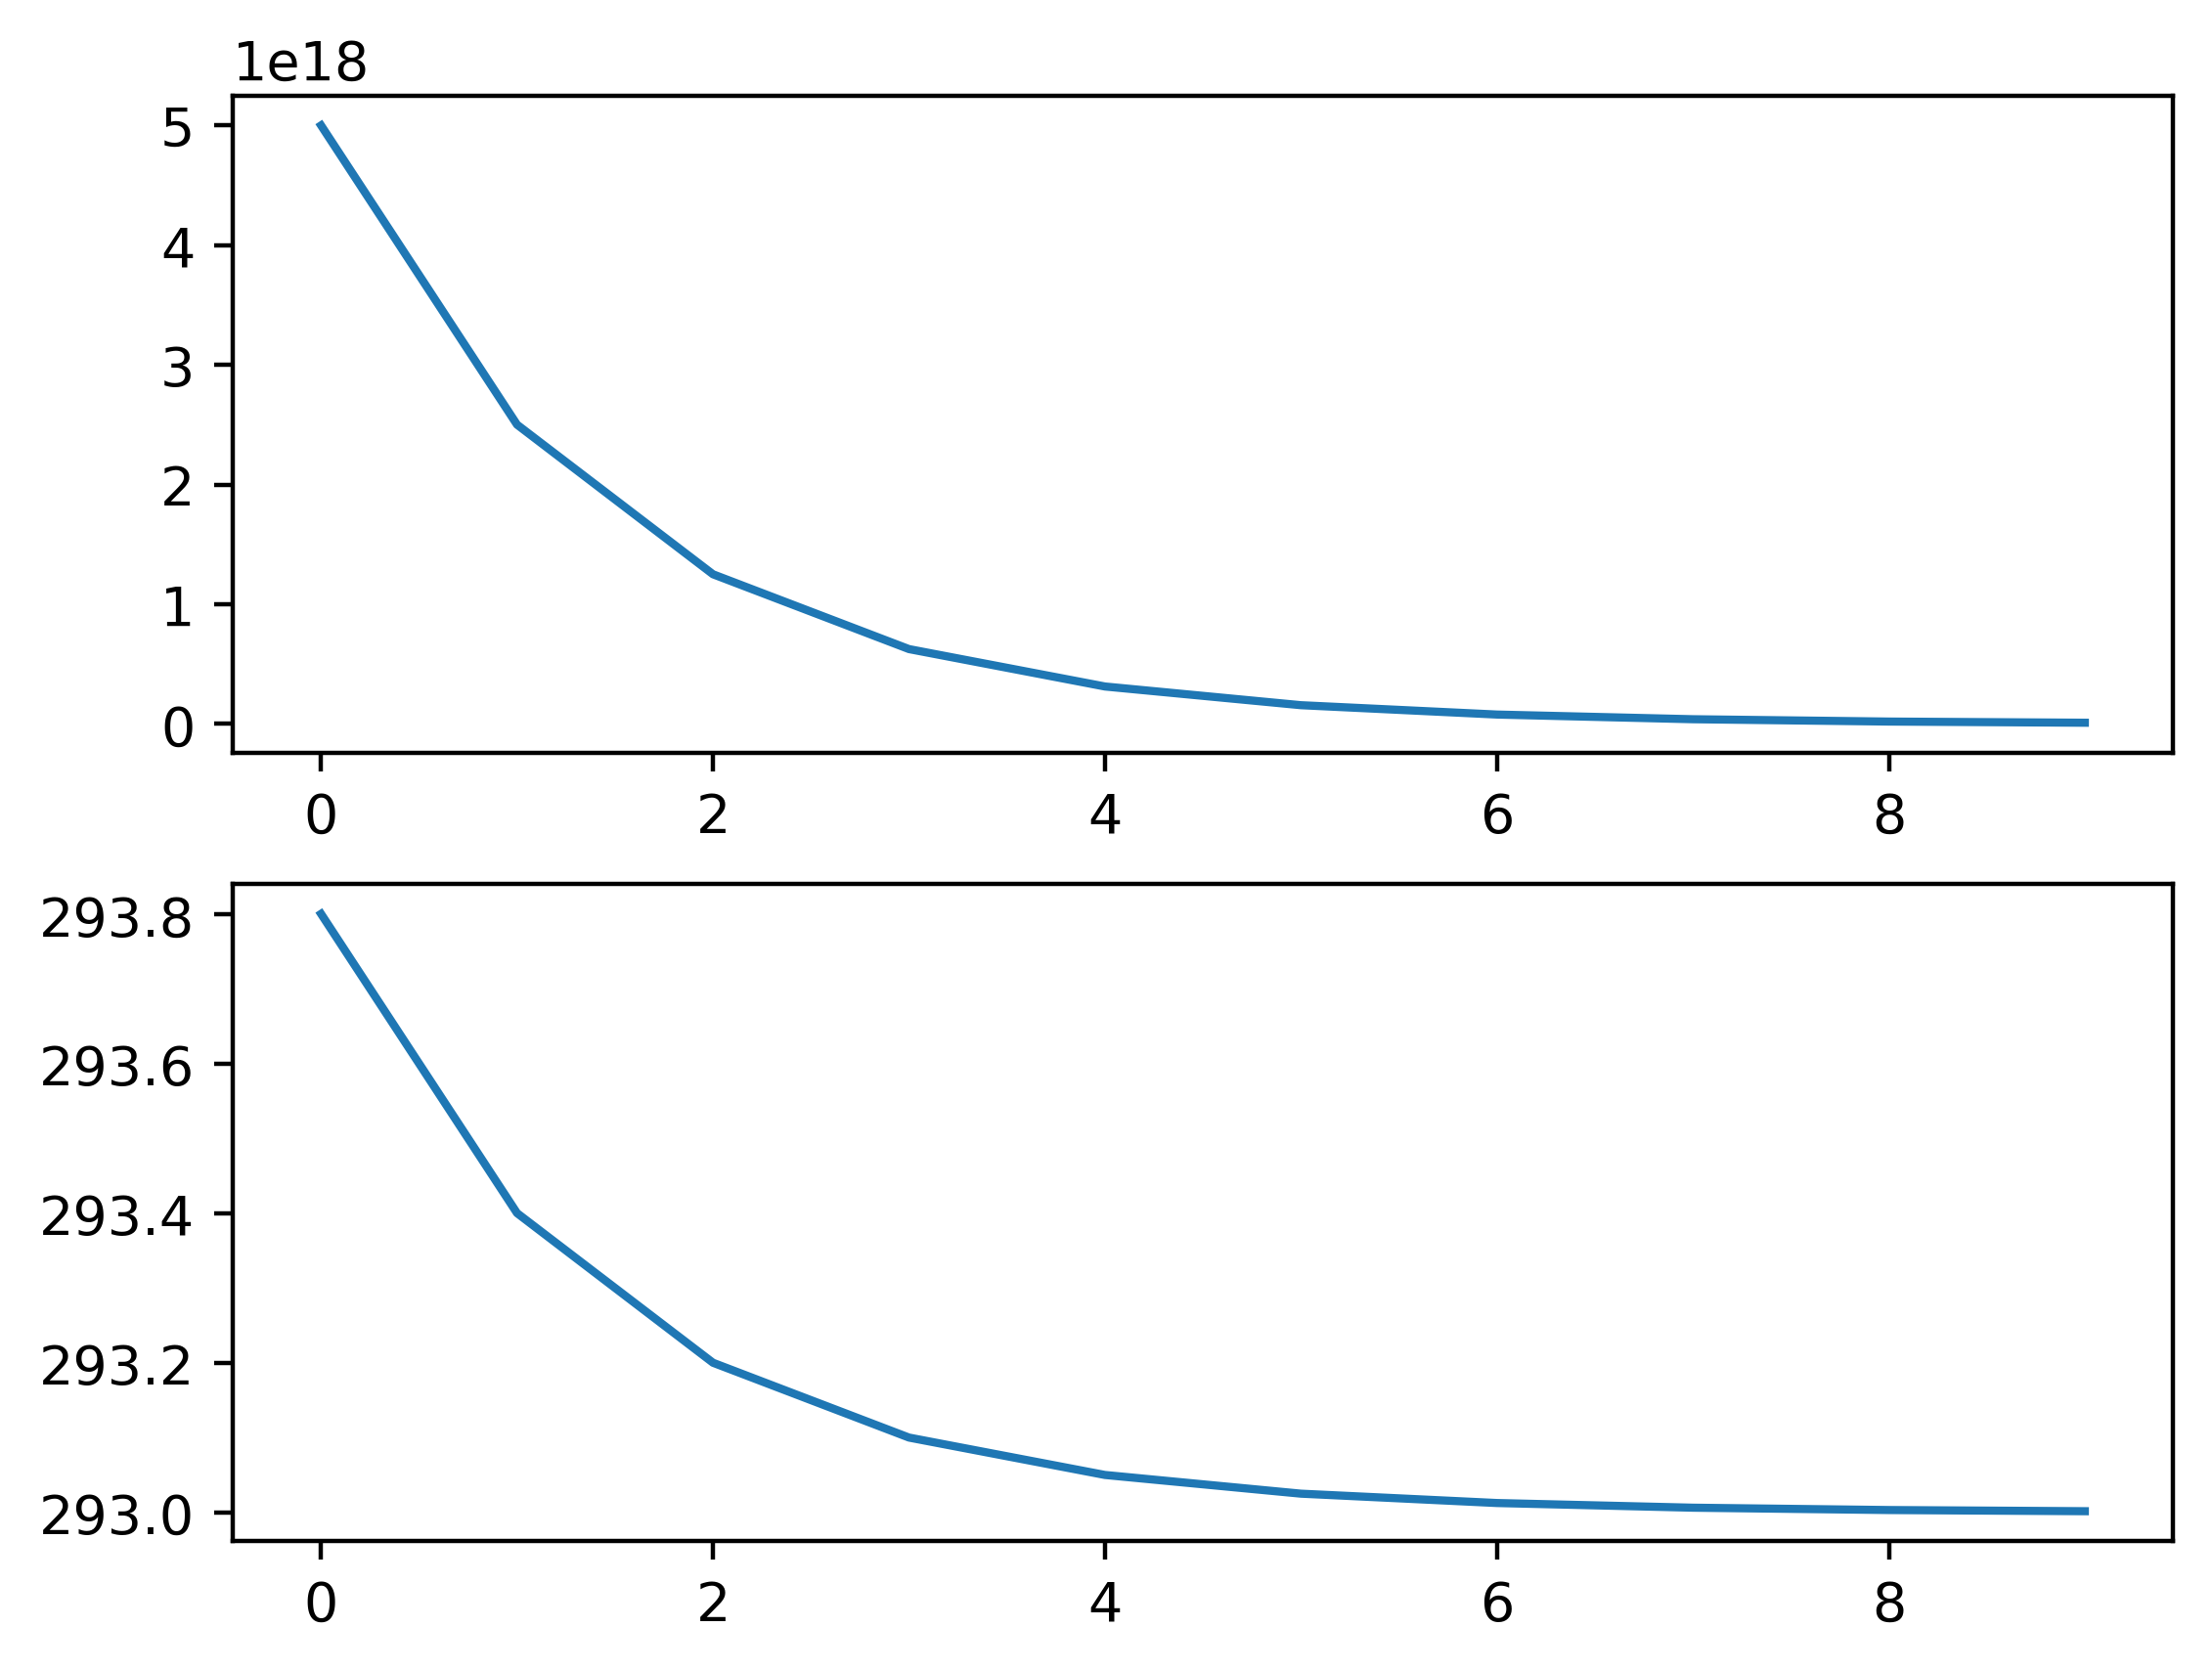

In [28]:
test_xray_energy = 1.0e21
element_qty = 10
t_conductivity = 1.0
specific_heat = 1.0
cs_area = 1.0
ic_temp = 293.0
element_length = 1.0
ablation_temp = 100.0
rad_abs_coefficient = 0.5
test_section = Section()
test_section.add_matl(element_qty,
                      t_conductivity,
                      specific_heat,
                      cs_area,
                      ic_temp,
                      element_length,
                      ablation_temp,
                      rad_abs_coefficient)
test_section.prop_xray_energy(test_xray_energy)
a_energy = test_section.get_absorbed_energy()
temp = test_section.get_temperatures()

fig, ax = plt.subplots(2)
x_points = range(0, element_qty)
ax[0].plot(x_points, a_energy)
ax[1].plot(x_points, temp)
plt.show()